In [26]:
import pandas as pd


In [27]:
df = pd.read_csv("../../data/processed/Roommate_Compatibility_Survey.csv")
df.head()

,Gender,Faculty,Religion,Parents_Abroad,Living_with_Parents,Do_you_smoke,Attitude_towards_Roommate_Smoking,Preferred_Roommate_Relationship_Type,Ideal_Study_Environment_Description,Attitude_towards_Borrowing_Sharing,...,Being loud when I’m studying/sleeping,Eating my food,Not picking up after themselves,Being unfriendly,Lack of respect for me and my privacy,Not being open-minded,Bad personal hygiene,Using my things without asking,Having guests over too much,Messy
0,1.0,0.25,1.0,0.0,1.0,0.0,1.0,1.0,0.5,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.25,1.0,1.0,0.0,0.0,1.0,0.0,0.5,0.5,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.25,1.0,0.0,1.0,0.0,0.0,1.0,0.5,0.5,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.25,1.0,0.0,1.0,0.0,1.0,1.0,0.5,0.5,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.25,1.0,0.0,1.0,0.0,0.5,0.0,0.5,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


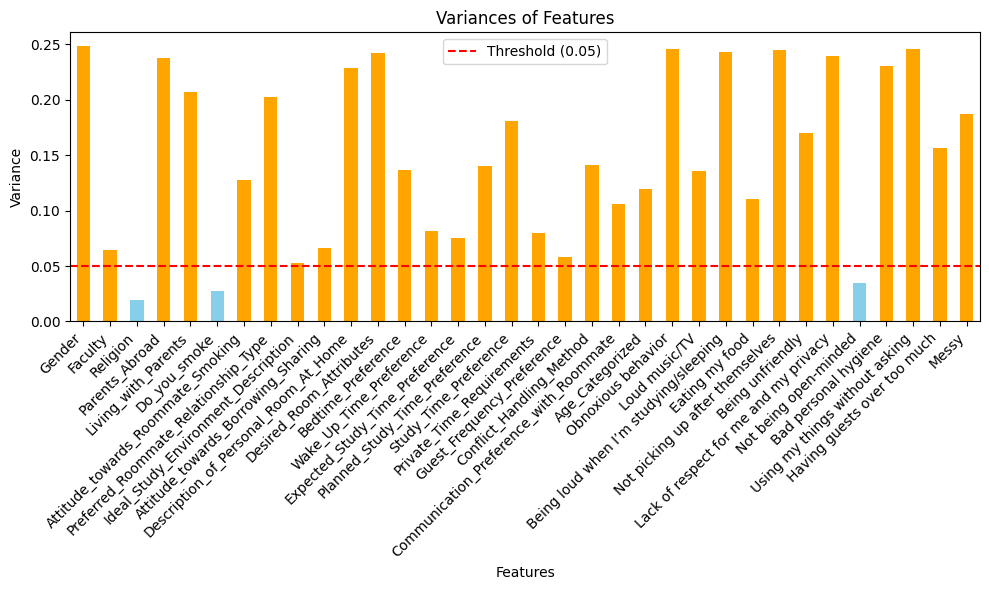

In [28]:
import matplotlib.pyplot as plt

# Define the threshold
threshold = 0.05 # Adjust the threshold as needed

# Calculate variances of the features
variances = df.var()

# Plot the variances
plt.figure(figsize=(10, 6))
variances.plot(kind='bar', color=['skyblue' if var < threshold else 'orange' for var in variances])
plt.title('Variances of Features')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold ({threshold})')
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
# Define the threshold
threshold = 0.05

variances = df.var()

low_threshold_columns = variances[variances < threshold]
high_threshold_columns = variances[variances >= threshold]

print("Columns with variances below the threshold (<", threshold, "):")
print(low_threshold_columns)

print("\nColumns with variances equal to or above the threshold (>= ", threshold, "):")
print(high_threshold_columns)


Columns with variances below the threshold (< 0.05 ):
Religion                 0.019374
Do_you_smoke             0.027532
Not being open-minded    0.034313
dtype: float64

Columns with variances equal to or above the threshold (>=  0.05 ):
Gender                                    0.248358
Faculty                                   0.064581
Parents_Abroad                            0.237901
Living_with_Parents                       0.207276
Attitude_towards_Roommate_Smoking         0.127715
Preferred_Roommate_Relationship_Type      0.202188
Ideal_Study_Environment_Description       0.053083
Attitude_towards_Borrowing_Sharing        0.066108
Description_of_Personal_Room_At_Home      0.228379
Desired_Room_Attributes                   0.242356
Bedtime_Preference                        0.136213
Wake_Up_Time_Preference                   0.081673
Expected_Study_Time_Preference            0.074865
Planned_Study_Time_Preference             0.140411
Study_Time_Preference                     0.18

In [34]:
filtered_df = df[high_threshold_columns.index]
filtered_df.head()

,Gender,Faculty,Parents_Abroad,Living_with_Parents,Attitude_towards_Roommate_Smoking,Preferred_Roommate_Relationship_Type,Ideal_Study_Environment_Description,Attitude_towards_Borrowing_Sharing,Description_of_Personal_Room_At_Home,Desired_Room_Attributes,...,Loud music/TV,Being loud when I’m studying/sleeping,Eating my food,Not picking up after themselves,Being unfriendly,Lack of respect for me and my privacy,Bad personal hygiene,Using my things without asking,Having guests over too much,Messy
0,1.0,0.25,0.0,1.0,1.0,1.0,0.5,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.25,1.0,0.0,1.0,0.0,0.5,0.5,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.0,0.25,0.0,1.0,0.0,1.0,0.5,0.5,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.25,0.0,1.0,1.0,1.0,0.5,0.5,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [35]:
filtered_df.columns

Index(['Gender', 'Faculty', 'Parents_Abroad', 'Living_with_Parents',
       'Attitude_towards_Roommate_Smoking',
       'Preferred_Roommate_Relationship_Type',
       'Ideal_Study_Environment_Description',
       'Attitude_towards_Borrowing_Sharing',
       'Description_of_Personal_Room_At_Home', 'Desired_Room_Attributes',
       'Bedtime_Preference', 'Wake_Up_Time_Preference',
       'Expected_Study_Time_Preference', 'Planned_Study_Time_Preference',
       'Study_Time_Preference', 'Private_Time_Requirements',
       'Guest_Frequency_Preference', 'Conflict_Handling_Method',
       'Communication_Preference_with_Roommate', 'Age_Categorized',
       'Obnoxious behavior', 'Loud music/TV',
       'Being loud when I’m studying/sleeping', 'Eating my food',
       'Not picking up after themselves', 'Being unfriendly',
       'Lack of respect for me and my privacy', 'Bad personal hygiene',
       'Using my things without asking', 'Having guests over too much',
       'Messy'],
      dtype='obj

In [36]:
filtered_df.to_csv('../../data/final/Roommate_Compatibility_Survey.csv', index=False)